In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
bs = 64

In [4]:
doc(ImageDataBunch.from_folder)

In [5]:
data = ImageDataBunch.from_folder('ASL_DATA',
                                 ds_tfms=get_transforms(), 
                                 size=224, bs=bs).normalize(imagenet_stats)

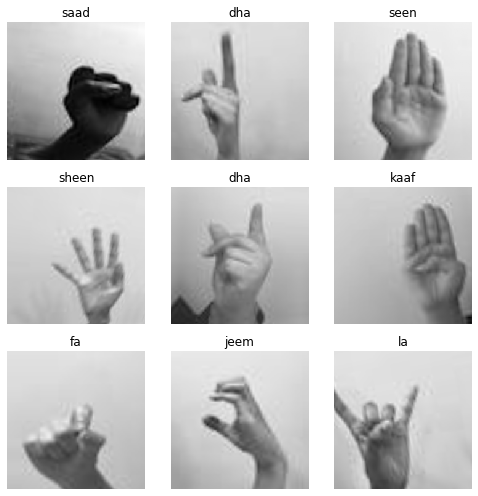

In [6]:
data.show_batch(rows=3, figsize=(7, 7))

In [7]:
print(data.classes)

['ain', 'al', 'aleff', 'bb', 'dal', 'dha', 'dhad', 'fa', 'gaaf', 'ghain', 'ha', 'haa', 'jeem', 'kaaf', 'khaa', 'la', 'laam', 'meem', 'nun', 'ra', 'saad', 'seen', 'sheen', 'ta', 'taa', 'thaa', 'thal', 'toot', 'waw', 'ya', 'yaa', 'zay']


In [8]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [9]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [10]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.668585,0.826845,0.262380,05:29
1,0.291109,0.593679,0.173503,04:41
2,0.173969,0.503377,0.145048,04:46
3,0.128856,0.490001,0.147265,04:42


In [11]:
learn.save('stage-1')

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
losses, idxs = interp.top_losses()
len(data.valid_ds) == len(losses) == len(idxs)

True

In [15]:
help(ClassificationInterpretation.plot_top_losses)

Help on function _cl_int_plot_top_losses in module fastai.vision.learner:

_cl_int_plot_top_losses(self, k, largest=True, figsize=(12, 12), heatmap: bool = False, heatmap_thresh: int = 16, alpha: float = 0.6, cmap: str = 'magma', show_text: bool = True, return_fig: bool = None) -> Union[matplotlib.figure.Figure, NoneType]
    Show images in `top_losses` along with their prediction, actual, loss, and probability of actual class.



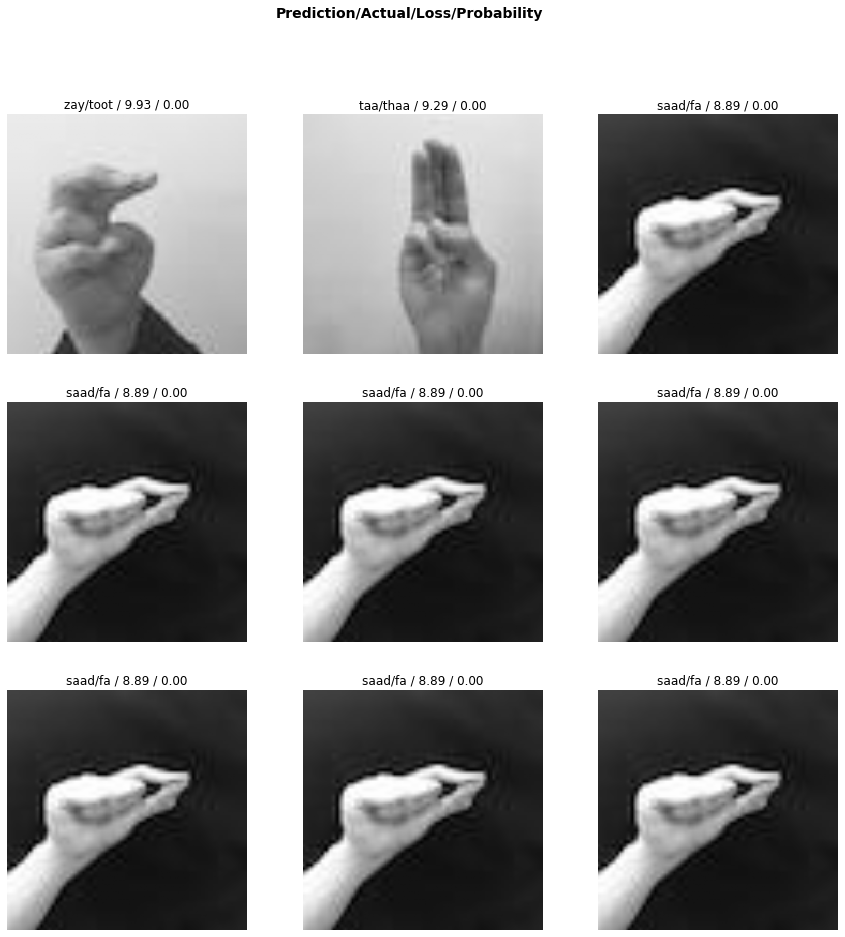

In [13]:
interp.plot_top_losses(9, figsize=(15, 15))

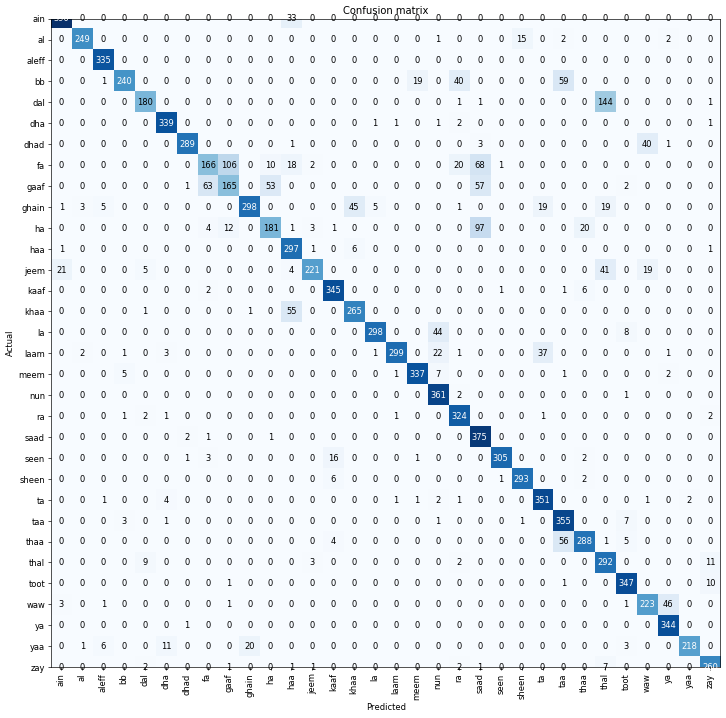

In [16]:
interp.plot_confusion_matrix(figsize=(12, 12), dpi=60)

In [17]:
interp.most_confused(min_val=10)

[('dal', 'thal', 144),
 ('fa', 'gaaf', 106),
 ('ha', 'saad', 97),
 ('fa', 'saad', 68),
 ('gaaf', 'fa', 63),
 ('bb', 'taa', 59),
 ('gaaf', 'saad', 57),
 ('thaa', 'taa', 56),
 ('khaa', 'haa', 55),
 ('gaaf', 'ha', 53),
 ('waw', 'ya', 46),
 ('ghain', 'khaa', 45),
 ('la', 'nun', 44),
 ('jeem', 'thal', 41),
 ('bb', 'ra', 40),
 ('dhad', 'waw', 40),
 ('laam', 'ta', 37),
 ('ain', 'haa', 33),
 ('laam', 'nun', 22),
 ('jeem', 'ain', 21),
 ('fa', 'ra', 20),
 ('ha', 'thaa', 20),
 ('yaa', 'ghain', 20),
 ('bb', 'meem', 19),
 ('ghain', 'ta', 19),
 ('ghain', 'thal', 19),
 ('jeem', 'waw', 19),
 ('fa', 'haa', 18),
 ('seen', 'kaaf', 16),
 ('al', 'sheen', 15),
 ('ha', 'gaaf', 12),
 ('thal', 'zay', 11),
 ('yaa', 'dha', 11),
 ('fa', 'ha', 10),
 ('toot', 'zay', 10)]

In [18]:
learn.unfreeze()

In [19]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.073843,0.283128,0.093958,06:10


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


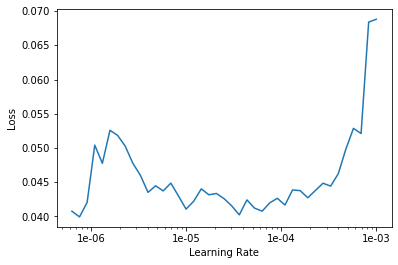

In [20]:
learn.lr_find()
learn.recorder.plot()

In [21]:
learn.fit_one_cycle(2, max_lr=slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.044477,0.296296,0.093126,06:12
1,0.020326,0.263107,0.082964,06:11


In [25]:
learn.save('stage-2')

In [3]:
bs = 32
data50 = ImageDataBunch.from_folder('ASL_DATA',
                                 ds_tfms=get_transforms(), 
                                 size=224, bs=bs).normalize(imagenet_stats)
learn50 = cnn_learner(data50, models.resnet50, metrics=error_rate)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


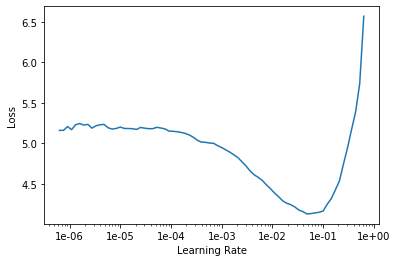

In [5]:
learn50.lr_find()
learn50.recorder.plot()

In [6]:
learn50.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.703302,0.963901,0.277901,09:36
1,0.318165,0.714646,0.183019,09:33
2,0.190185,0.523196,0.127587,09:39
3,0.125946,0.530765,0.115299,09:34
4,0.089641,0.476301,0.111973,09:34
5,0.073621,0.445588,0.097653,09:32
6,0.045549,0.446512,0.098392,09:37
7,0.032830,0.465400,0.102827,09:32


In [8]:
learn50.save('stage-1-50')

In [9]:
interp = ClassificationInterpretation.from_learner(learn50)

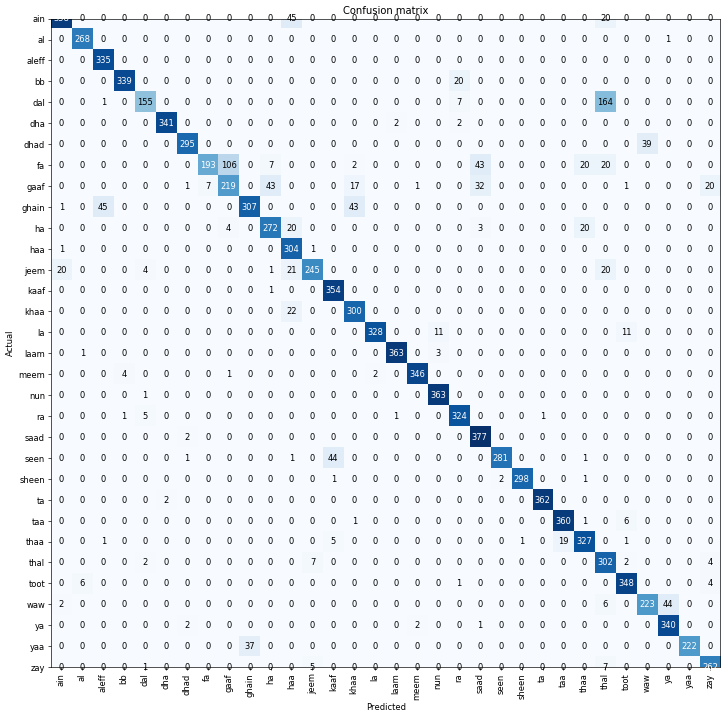

In [10]:
interp.plot_confusion_matrix(figsize=(12, 12), dpi=60)

In [11]:
interp.most_confused(min_val=10)

[('dal', 'thal', 164),
 ('fa', 'gaaf', 106),
 ('ain', 'haa', 45),
 ('ghain', 'aleff', 45),
 ('seen', 'kaaf', 44),
 ('waw', 'ya', 44),
 ('fa', 'saad', 43),
 ('gaaf', 'ha', 43),
 ('ghain', 'khaa', 43),
 ('dhad', 'waw', 39),
 ('yaa', 'ghain', 37),
 ('gaaf', 'saad', 32),
 ('khaa', 'haa', 22),
 ('jeem', 'haa', 21),
 ('ain', 'thal', 20),
 ('bb', 'ra', 20),
 ('fa', 'thaa', 20),
 ('fa', 'thal', 20),
 ('gaaf', 'zay', 20),
 ('ha', 'haa', 20),
 ('ha', 'thaa', 20),
 ('jeem', 'ain', 20),
 ('jeem', 'thal', 20),
 ('thaa', 'taa', 19),
 ('gaaf', 'khaa', 17),
 ('la', 'nun', 11),
 ('la', 'toot', 11)]